In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


# EDA
1. combine daily datasets into a dictionary to concat together as a whole df to manage as a whole.
<br><br>
2. extract only the necessary columns to be used in prediction
      'Province_State', 
      'Last_Update', 
      'Confirmed', 
      'Deaths', 
      'Recovered', 
      'Active', 
      'Incident_Rate',
      'Mortality_Rate',
      'People_Tested',
      'Testing_Rate',
      'Hospitalization_Rate'
      
      To reduce space and time, I will use columns which I feel are MOST important: 
      'Province_State', 'Last_Update', 'Confirmed', 'Deaths', 'Recovered', 'Active',
      'People_Tested', 'Testing_Rate', 'Mortality_Rate', 'Incident_Rate'


In [2]:
import os

csv_list = []
# append csv file names into an empty list to be iterated through afterwards
for files in sorted(os.listdir("csse_covid19_daily_us/.")):
    if files.endswith(".csv"):
        csv_list.append(files)
        
# check if it appended correctly to csv_list
print(len(csv_list))
csv_list[:5]

100


['04-12-2020.csv',
 '04-13-2020.csv',
 '04-14-2020.csv',
 '04-15-2020.csv',
 '04-16-2020.csv']

In [199]:
# checking whether date error is rooted from the initial data
#apr13 = pd.read_csv('csse_covid19_daily_us/04-13-2020.csv', sep=',')
#apr13[apr13.Province_State == 'Florida']

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
11,Florida,US,2020-04-14 00:42:00,27.7663,-81.6868,21019,499,NaN,122520.0,12.0,579.387193,196207.0,2833.0,0.405628,84000012,USA,924.083459,2.302896


In [3]:
# iterate through csv_list and read_csv > set dates as dict keys > daily data as vals
feature_list = ['Province_State', 'Last_Update', 'Confirmed', 'Deaths', 
                'Recovered', 'Active', 'People_Tested', 'Testing_Rate', 
                'Mortality_Rate', 'Incident_Rate']
 
# datetime_idx = pd.DatetimeIndex([filename[0:-4] for filename in csv_list])
daily_states_dict = {}

for i in range(len(csv_list)):
    csv_str = 'csse_covid19_daily_us/'+csv_list[i]
    today_df = pd.read_csv(csv_str, sep=',')
    filter_df = today_df[feature_list]
    daily_states_dict[i] = filter_df

if len(daily_states_dict) == 100:
    print("Appended all 100 days and corresponding dataframes.")
else:
    print("Loop didn't work correctly.")

Appended all 100 days and corresponding dataframes.


In [191]:
df = pd.concat(daily_states_dict, axis=0)
df

,,Province_State,Last_Update,Confirmed,Deaths,Recovered,Active,People_Tested,Testing_Rate,Mortality_Rate,Incident_Rate
0,10,Florida,2020-04-12 23:18:15,19895,461,NaN,19434.0,182753.0,860.718651,2.317165,93.700227
1,11,Florida,2020-04-14 00:42:00,21019,499,NaN,122520.0,196207.0,924.083459,0.405628,579.387193
2,11,Florida,2020-04-14 23:33:31,21628,571,NaN,21057.0,203180.0,956.924459,2.640096,101.862202
3,11,Florida,2020-04-15 22:56:51,22511,596,NaN,21915.0,213509.0,1005.571337,2.647595,106.020900
4,11,Florida,2020-04-16 23:30:51,23343,668,NaN,22675.0,219248.0,1032.600520,2.861672,109.939402
...,...,...,...,...,...,...,...,...,...,...,...
95,11,Florida,2020-07-17 04:35:02,315775,4677,NaN,311098.0,2815618.0,13109.472381,1.481118,1470.243350
96,11,Florida,2020-07-18 04:34:58,327241,4805,NaN,322436.0,2880768.0,13412.809739,1.468337,1523.628863
97,11,Florida,2020-07-19 04:35:12,337569,4895,NaN,332674.0,2931988.0,13651.289240,1.450074,1571.715866
98,11,Florida,2020-07-20 05:34:58,350047,4982,NaN,345065.0,3002641.0,13980.248478,1.423237,1629.813234


In [5]:
# remove muti-indexing; later will groupby dates
df_reidx = df.reset_index(drop=True)
df_reidx

,Province_State,Last_Update,Confirmed,Deaths,Recovered,Active,People_Tested,Testing_Rate,Mortality_Rate,Incident_Rate
0,Alabama,2020-04-12 23:18:15,3563,93,NaN,3470.0,21583.0,460.300152,2.610160,75.988020
1,Alaska,2020-04-12 23:18:15,272,8,66.0,264.0,8038.0,1344.711576,2.941176,45.504049
2,Arizona,2020-04-12 23:18:15,3542,115,NaN,3427.0,42109.0,578.522286,3.246753,48.662422
3,Arkansas,2020-04-12 23:18:15,1280,27,367.0,1253.0,19722.0,761.753354,2.109375,49.439423
4,California,2020-04-12 23:18:15,22795,640,NaN,22155.0,190328.0,485.423868,2.812020,58.137726
...,...,...,...,...,...,...,...,...,...,...
5813,Virginia,2020-07-21 04:38:59,78375,2031,10107.0,66237.0,920461.0,10783.890236,2.591388,918.221845
5814,Washington,2020-07-21 04:38:59,47743,1453,NaN,46290.0,809339.0,10628.369959,3.043378,626.968757
5815,West Virginia,2020-07-21 04:38:59,5084,100,3466.0,1518.0,234980.0,13111.647649,1.966955,283.682086
5816,Wisconsin,2020-07-21 04:38:59,43018,846,33130.0,9042.0,783866.0,13462.857630,1.966619,738.831904


### Clean up the concatenated dataframe**


In [6]:
# first, reset index with dates by re-formatting date column and groupby dates
df_reidx['date'] = pd.to_datetime(df_reidx['Last_Update']).dt.strftime('%Y-%m-%d')
df_reidx.drop('Last_Update', axis=1, inplace=True)
df_reidx
#df.set_index('date', inplace=True) doesn't groupby them, but sets date as index

,Province_State,Confirmed,Deaths,Recovered,Active,People_Tested,Testing_Rate,Mortality_Rate,Incident_Rate,date
0,Alabama,3563,93,NaN,3470.0,21583.0,460.300152,2.610160,75.988020,2020-04-12
1,Alaska,272,8,66.0,264.0,8038.0,1344.711576,2.941176,45.504049,2020-04-12
2,Arizona,3542,115,NaN,3427.0,42109.0,578.522286,3.246753,48.662422,2020-04-12
3,Arkansas,1280,27,367.0,1253.0,19722.0,761.753354,2.109375,49.439423,2020-04-12
4,California,22795,640,NaN,22155.0,190328.0,485.423868,2.812020,58.137726,2020-04-12
...,...,...,...,...,...,...,...,...,...,...
5813,Virginia,78375,2031,10107.0,66237.0,920461.0,10783.890236,2.591388,918.221845,2020-07-21
5814,Washington,47743,1453,NaN,46290.0,809339.0,10628.369959,3.043378,626.968757,2020-07-21
5815,West Virginia,5084,100,3466.0,1518.0,234980.0,13111.647649,1.966955,283.682086,2020-07-21
5816,Wisconsin,43018,846,33130.0,9042.0,783866.0,13462.857630,1.966619,738.831904,2020-07-21


In [7]:
# first look at one day to see the significance of features

rand_df = df_reidx[df_reidx['date']=='2020-05-13']
rand_df_bystate = rand_df.set_index('Province_State')
#rand_df_bystateT = rand_df_bystate.T
rand_df_bystate.drop('date', axis=1, inplace=True)
rand_df_bystate.drop(['Grand Princess', 'Diamond Princess'], axis=0, inplace=True)
rand_df_bystate['Recovered'] = rand_df_bystate['Recovered'].fillna(0)
rand_df_bystate['Mortality_Rate'] = rand_df_bystate['Mortality_Rate'].fillna(0)
rand_df_bystate.head()
# Confirmed, Recovered, Active, Deaths are most robust way to determine risk ranges/
    # in determining risk ranges of Incident_rate

,Confirmed,Deaths,Recovered,Active,People_Tested,Testing_Rate,Mortality_Rate,Incident_Rate
Province_State,,,,,,,,
Alabama,10464,435,0.0,10029.0,133218.0,2841.137265,4.157110,223.165491
Alaska,383,10,334.0,39.0,29961.0,5012.304496,2.610966,64.073717
American Samoa,0,0,0.0,0.0,105.0,188.709764,0.000000,0.000000
Arizona,11736,562,2909.0,8265.0,122842.0,1687.687542,4.788684,161.237207
Arkansas,4164,95,3220.0,849.0,70444.0,2720.867724,2.281460,160.832622


In [8]:
df_reidx[df_reidx['date'] == '2020-05-14'].head()

,Province_State,Confirmed,Deaths,Recovered,Active,People_Tested,Testing_Rate,Mortality_Rate,Incident_Rate,date
1816,Alabama,10700,450,NaN,10250.0,136372.0,2908.402552,4.205607,228.198657,2020-05-14
1817,Alaska,383,10,338.0,35.0,30649.0,5127.402973,2.610966,64.073717,2020-05-14
1818,American Samoa,0,0,NaN,0.0,105.0,188.709764,NaN,0.000000,2020-05-14
1819,Arizona,12216,595,2979.0,8642.0,127750.0,1755.117008,4.870661,167.831776,2020-05-14
1820,Arkansas,4236,97,3220.0,919.0,73215.0,2827.896349,2.289896,163.613589,2020-05-14


    Looking over two consequtive days' value changes, it makes more sense to deal with 
    val diff each day, and then use the avg of value changes (for y as well)

##### Manage missing values
    - for dates, fillna(method='ffill') - depending on row placement of the state within the df

    - other feature values: confirmed, deaths, active fill with 0
    
    - if there are nulls in other rest feature vals, look over and fill with 0

In [9]:
# check count and dropna where most values are null
print(df_reidx.info(), '\n')
print("number of NaNs: ", df_reidx.isnull().sum().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5818 entries, 0 to 5817
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Province_State  5818 non-null   object 
 1   Confirmed       5818 non-null   int64  
 2   Deaths          5818 non-null   int64  
 3   Recovered       4391 non-null   float64
 4   Active          5801 non-null   float64
 5   People_Tested   5600 non-null   float64
 6   Testing_Rate    5600 non-null   float64
 7   Mortality_Rate  5700 non-null   float64
 8   Incident_Rate   5600 non-null   float64
 9   date            5799 non-null   object 
dtypes: float64(6), int64(2), object(2)
memory usage: 454.7+ KB
None 

number of NaNs:  2235


In [8]:
# first, change to easily accessible ones
df_reidx.columns = df_reidx.columns.str.lower()
df_reidx.rename(columns={'province_state': 'state'}, inplace=True)


In [9]:
print(df_reidx.state.unique())

['Alabama' 'Alaska' 'Arizona' 'Arkansas' 'California' 'Colorado'
 'Connecticut' 'Delaware' 'Diamond Princess' 'District of Columbia'
 'Florida' 'Georgia' 'Grand Princess' 'Guam' 'Hawaii' 'Idaho' 'Illinois'
 'Indiana' 'Iowa' 'Kansas' 'Kentucky' 'Louisiana' 'Maine' 'Maryland'
 'Massachusetts' 'Michigan' 'Minnesota' 'Mississippi' 'Missouri' 'Montana'
 'Nebraska' 'Nevada' 'New Hampshire' 'New Jersey' 'New Mexico' 'New York'
 'North Carolina' 'North Dakota' 'Ohio' 'Oklahoma' 'Oregon' 'Pennsylvania'
 'Puerto Rico' 'Rhode Island' 'South Carolina' 'South Dakota' 'Tennessee'
 'Texas' 'Utah' 'Vermont' 'Virginia' 'Washington' 'West Virginia'
 'Wisconsin' 'Wyoming' 'American Samoa' 'Northern Mariana Islands'
 'Recovered' 'Virgin Islands']


In [12]:
print("GRAND PRINCESS: \n\n{}".format(df_reidx[df_reidx['state']=='Grand Princess'].agg(np.mean)), '\n\n')

print("DIAMOND PRINCESS: \n\n{}".format(df_reidx[df_reidx['state']=='Diamond Princess'].agg(np.mean)), '\n')


GRAND PRINCESS: 

confirmed         103.000000
deaths              2.670000
recovered           0.000000
active            100.330000
people_tested            NaN
testing_rate             NaN
mortality_rate      2.592233
incident_rate            NaN
dtype: float64 


DIAMOND PRINCESS: 

confirmed         49.0
deaths             0.0
recovered          0.0
active            49.0
people_tested      NaN
testing_rate       NaN
mortality_rate     0.0
incident_rate      NaN
dtype: float64 



In [13]:
# check irrelevant locations in 'states' 

df_reidx.describe()

,confirmed,deaths,recovered,active,people_tested,testing_rate,mortality_rate,incident_rate
count,5818.000000,5818.000000,4391.000000,5801.000000,5.600000e+03,5600.000000,5700.000000,5600.000000
mean,32692.493469,1668.792712,11057.379868,22972.726944,3.489471e+05,5864.633381,4.046941,481.698665
std,60430.019162,4109.291674,18960.665192,49320.617369,6.208745e+05,4634.567964,2.858384,460.950897
min,0.000000,0.000000,0.000000,-120720.000000,3.000000e+00,5.391708,0.000000,0.000000
25%,2311.500000,67.000000,724.500000,842.000000,4.889600e+04,2196.716493,2.389166,139.600094
50%,10975.000000,368.500000,3157.000000,6258.000000,1.433470e+05,4735.449294,3.780917,317.602172
75%,35629.500000,1422.750000,11837.000000,20340.000000,3.897520e+05,8440.463156,5.151574,673.463513
max,407326.000000,32506.000000,177871.000000,390100.000000,6.414321e+06,26549.442542,70.370370,2093.837730


    Comparing feature means to the entire dataset, Diamond & Grand cruise ship 
    circumstances may not be relevant to average numbers in US, so it may be 
    feasible to extract them, as well as 'Recovered', since that is not a state.

In [10]:
# drop cruise ships & other not relevant

filter_df = df_reidx.set_index('state')
filter_df = filter_df.drop(['Grand Princess', 'Diamond Princess', 'Recovered'], axis=0)
filter_df.reset_index(inplace=True)
filter_df.head()

,state,confirmed,deaths,recovered,active,people_tested,testing_rate,mortality_rate,incident_rate,date
0,Alabama,3563,93,NaN,3470.0,21583.0,460.300152,2.610160,75.988020,2020-04-12
1,Alaska,272,8,66.0,264.0,8038.0,1344.711576,2.941176,45.504049,2020-04-12
2,Arizona,3542,115,NaN,3427.0,42109.0,578.522286,3.246753,48.662422,2020-04-12
3,Arkansas,1280,27,367.0,1253.0,19722.0,761.753354,2.109375,49.439423,2020-04-12
4,California,22795,640,NaN,22155.0,190328.0,485.423868,2.812020,58.137726,2020-04-12


In [11]:
# check viability of filling in with 0 in features
#filled_recv = filter_df['recovered'].fillna(0)
#filter_df.drop('active_off', axis=1, inplace=True)
#filter_df['active_off'] = filter_df['confirmed'] - (filter_df['deaths']+filled_recv)
#filter_df[filter_df['active_off'] != filter_df['active']]
#filter_df

,state,confirmed,deaths,recovered,active,people_tested,testing_rate,mortality_rate,incident_rate,date
0,Alabama,3563,93,NaN,3470.0,21583.0,460.300152,2.610160,75.988020,2020-04-12
1,Alaska,272,8,66.0,264.0,8038.0,1344.711576,2.941176,45.504049,2020-04-12
2,Arizona,3542,115,NaN,3427.0,42109.0,578.522286,3.246753,48.662422,2020-04-12
3,Arkansas,1280,27,367.0,1253.0,19722.0,761.753354,2.109375,49.439423,2020-04-12
4,California,22795,640,NaN,22155.0,190328.0,485.423868,2.812020,58.137726,2020-04-12
...,...,...,...,...,...,...,...,...,...,...
5595,Virginia,78375,2031,10107.0,66237.0,920461.0,10783.890236,2.591388,918.221845,2020-07-21
5596,Washington,47743,1453,NaN,46290.0,809339.0,10628.369959,3.043378,626.968757,2020-07-21
5597,West Virginia,5084,100,3466.0,1518.0,234980.0,13111.647649,1.966955,283.682086,2020-07-21
5598,Wisconsin,43018,846,33130.0,9042.0,783866.0,13462.857630,1.966619,738.831904,2020-07-21


    Glimpsing over the difference between given 'active' and 
    'confirmed'-('deaths'+'recovered') results('active_off'), there are some states 
    that doesn't match up, indicating that residual active numbers are neither
    reported in 'deaths' or 'recovered'. 
    
    Although that may be something to consider, it could also be a miniscule aspect in 
    predicting y.
    
    Therefore, 'recovered' nulls can be filled with 0, since many of them match up with 
    the confirmed and active differences.

In [12]:
clean_df = filter_df.copy()
clean_df['recovered'] = filter_df['recovered'].fillna(0)
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5600 entries, 0 to 5599
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   state           5600 non-null   object 
 1   confirmed       5600 non-null   int64  
 2   deaths          5600 non-null   int64  
 3   recovered       5600 non-null   float64
 4   active          5583 non-null   float64
 5   people_tested   5600 non-null   float64
 6   testing_rate    5600 non-null   float64
 7   mortality_rate  5500 non-null   float64
 8   incident_rate   5600 non-null   float64
 9   date            5590 non-null   object 
dtypes: float64(6), int64(2), object(2)
memory usage: 437.6+ KB


In [18]:
# check 'active' and fill with 0
clean_df[clean_df['active'].isnull()==True]['state'].unique()

array(['American Samoa'], dtype=object)

    Only American Samoa is missing values in active column.

In [19]:
clean_df[clean_df['state']=='American Samoa'].head()

,state,confirmed,deaths,recovered,active,people_tested,testing_rate,mortality_rate,incident_rate,date,active_off
53,American Samoa,0,0,0.0,0.0,3.0,5.391708,NaN,0.0,NaN,0.0
58,American Samoa,0,0,0.0,NaN,3.0,5.391708,NaN,0.0,NaN,0.0
114,American Samoa,0,0,0.0,NaN,3.0,5.391708,NaN,0.0,NaN,0.0
170,American Samoa,0,0,0.0,NaN,3.0,5.391708,NaN,0.0,NaN,0.0
226,American Samoa,0,0,0.0,NaN,3.0,5.391708,NaN,0.0,NaN,0.0


    The state has barely any reports (which is a good thing).
    Fill all of its nulls across all missing cols with 0 except for date.

In [13]:
clean_df['active'].fillna(0, inplace=True)
clean_df['mortality_rate'].fillna(0, inplace=True)
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5600 entries, 0 to 5599
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   state           5600 non-null   object 
 1   confirmed       5600 non-null   int64  
 2   deaths          5600 non-null   int64  
 3   recovered       5600 non-null   float64
 4   active          5600 non-null   float64
 5   people_tested   5600 non-null   float64
 6   testing_rate    5600 non-null   float64
 7   mortality_rate  5600 non-null   float64
 8   incident_rate   5600 non-null   float64
 9   date            5590 non-null   object 
dtypes: float64(6), int64(2), object(2)
memory usage: 437.6+ KB


In [21]:
# check states with missing dates and fill with forward fills
print(clean_df.loc[clean_df['date'].isnull()==True, 'state'].unique())

print("missing date count: ", clean_df['date'].isnull().sum())


['American Samoa' 'Virgin Islands']
missing date count:  10


In [14]:
# check if filled in
clean_df['date'] = clean_df['date'].fillna(method='ffill')

print("missing date count: ", clean_df['date'].isnull().sum())
clean_df.info()

missing date count:  0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5600 entries, 0 to 5599
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   state           5600 non-null   object 
 1   confirmed       5600 non-null   int64  
 2   deaths          5600 non-null   int64  
 3   recovered       5600 non-null   float64
 4   active          5600 non-null   float64
 5   people_tested   5600 non-null   float64
 6   testing_rate    5600 non-null   float64
 7   mortality_rate  5600 non-null   float64
 8   incident_rate   5600 non-null   float64
 9   date            5600 non-null   object 
dtypes: float64(6), int64(2), object(2)
memory usage: 437.6+ KB


In [23]:
# clean_df.drop('active_off', axis=1, inplace=True)

In [15]:
# for some reason, 'date' is no longer datetime, so convert again
clean_df['date'] = pd.to_datetime(clean_df['date'])
clean_df.head()

,state,confirmed,deaths,recovered,active,people_tested,testing_rate,mortality_rate,incident_rate,date
0,Alabama,3563,93,0.0,3470.0,21583.0,460.300152,2.610160,75.988020,2020-04-12
1,Alaska,272,8,66.0,264.0,8038.0,1344.711576,2.941176,45.504049,2020-04-12
2,Arizona,3542,115,0.0,3427.0,42109.0,578.522286,3.246753,48.662422,2020-04-12
3,Arkansas,1280,27,367.0,1253.0,19722.0,761.753354,2.109375,49.439423,2020-04-12
4,California,22795,640,0.0,22155.0,190328.0,485.423868,2.812020,58.137726,2020-04-12


In [25]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5600 entries, 0 to 5599
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   state           5600 non-null   object        
 1   confirmed       5600 non-null   int64         
 2   deaths          5600 non-null   int64         
 3   recovered       5600 non-null   float64       
 4   active          5600 non-null   float64       
 5   people_tested   5600 non-null   float64       
 6   testing_rate    5600 non-null   float64       
 7   mortality_rate  5600 non-null   float64       
 8   incident_rate   5600 non-null   float64       
 9   date            5600 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(6), int64(2), object(1)
memory usage: 437.6+ KB


# Transform feature and y values (daily value diff):

1. Get daily diff for feature and target values<br><br>
    
    - aggregate each day's columns across all states. 
    - get a "safe" range and assess outliers to determine safe/risky categories
    
    * IGNORE HERE: first thought was to consider state by state, since each state has differences in volume. However, it seems to be a bit more complicated, so I am thinking to proceed with comprehensive measure across dates
    
        - get diff first for each state by agg each features across entire timeline
        try out getting daily diff for each state's mortality/incident proportion in order to compare across states
        - compare the aggregated mean of diff of each state across entire timeline state by state
        - columns as dates
        - pandas df.diff(axis=1)
            * params: 
                  periods=n (n as integer; getting diff with n prior row/col)
    

2. Assess outliers (using iqr) and group into risky/normal


* ultimately, I want to end up with a ts df where 
    columns as: dates
    groupby states with rows of daily diff of each features 
    
    - 

In [16]:
clean_df.head()

,state,confirmed,deaths,recovered,active,people_tested,testing_rate,mortality_rate,incident_rate,date
0,Alabama,3563,93,0.0,3470.0,21583.0,460.300152,2.610160,75.988020,2020-04-12
1,Alaska,272,8,66.0,264.0,8038.0,1344.711576,2.941176,45.504049,2020-04-12
2,Arizona,3542,115,0.0,3427.0,42109.0,578.522286,3.246753,48.662422,2020-04-12
3,Arkansas,1280,27,367.0,1253.0,19722.0,761.753354,2.109375,49.439423,2020-04-12
4,California,22795,640,0.0,22155.0,190328.0,485.423868,2.812020,58.137726,2020-04-12


In [34]:
# try out one day assessment first
oneday = clean_df[clean_df.date == '2020-04-12']

# check out how values are arranged when sorted by incident rate: def seems to imply some risk relevance.
oneday.sort_values(by='incident_rate', inplace=True)

# filter out outliers as seperate df by assessing only incident_rate

q1, median, q3 = np.percentile(oneday.incident_rate, [25, 50, 75])
print(q1, median)

51.59221434 71.401808405


/Users/jmaclvin/Desktop/projects/co19-weekly-us/venv/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [74]:
# set incident rate iqr range to assess safe range; 
iqr_IR = q3-q1
low = q1 - 1.5 * iqr_IR
high = q3 + 1.5 * iqr_IR
print(low, high)


-57.53252058749999 233.46677255249998


In [75]:
# then compute "bad" ranges: x < q1 - 1.5 * iqr, x > q + 1.5 * iqr
bad_IR = oneday[(oneday.incident_rate < (q1 - 1.5 * iqr_IR)) | (oneday.incident_rate > (q3 + 1.5 * iqr_IR))]
len(bad_IR)

8

original day one IR: 
 count      56.000000
mean      132.096557
std       180.366308
min         0.000000
25%        51.592214
50%        71.401808
75%       124.342038
max      1121.124012
Name: incident_rate, dtype: float64

Safe iqr low,high bounds (-57.53, 233.47):


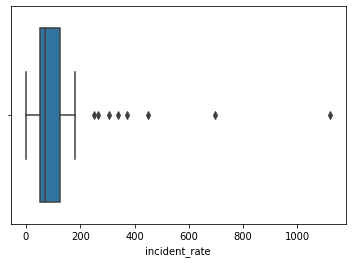

bad ranges day one IR: 
 count       8.000000
mean      474.461791
std       297.548909
min       251.566746
25%       294.640323
50%       354.356044
75%       510.072056
max      1121.124012
Name: incident_rate, dtype: float64

bad ranges of values filtered from incident rate column: 
 count     48.000000
mean      75.035684
std       40.083930
min        0.000000
25%       49.245173
50%       62.560889
75%       93.777696
max      182.228445
Name: incident_rate, dtype: float64


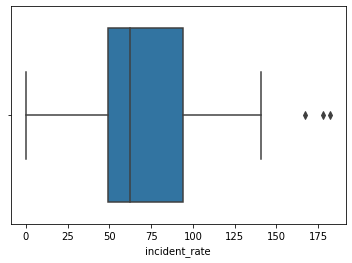

In [78]:
# compare stats and plots of original df and filtered, as well as with bad

print("original day one IR: \n", oneday.incident_rate.describe())
print("\nSafe iqr low,high bounds ({}, {}):".format(round(q1-1.5*iqr_IR, 2),round(q3+1.5*iqr_IR, 2)))
sns.boxplot(oneday.incident_rate)
plt.show()

# stat of only "bad" values of incident rate
print("bad ranges day one IR: \n", bad_IR.incident_rate.describe())

# stat and box plot of bad filtered
safe_IR = oneday[(oneday.incident_rate >= low) & (oneday.incident_rate <= high)]
print("\nbad ranges of values filtered from incident rate column: \n",
      safe_IR.incident_rate.describe())
sns.boxplot(safe_IR.incident_rate)
plt.show()

    It seems best to cut off from 233 to be exact, based on the higher iqr bound

In [83]:
# assess filtered data and bad
safe_IR.tail(10)

,state,confirmed,deaths,recovered,active,people_tested,testing_rate,mortality_rate,incident_rate,date
43,South Dakota,730,6,197.0,724.0,8553.0,1162.262941,0.821918,99.199339,2020-04-12
47,Vermont,727,27,15.0,700.0,9841.0,1611.717172,3.713893,119.064972,2020-04-12
15,Indiana,7928,343,0.0,7585.0,42489.0,649.282380,4.326438,121.149255,2020-04-12
10,Georgia,12452,433,0.0,12019.0,54453.0,537.043983,3.477353,122.808141,2020-04-12
5,Colorado,7307,289,0.0,7018.0,34873.0,615.389991,3.955112,128.943729,2020-04-12
21,Maryland,8225,236,456.0,7989.0,49764.0,837.307673,2.869301,138.390314,2020-04-12
49,Washington,10609,506,0.0,10103.0,93615.0,1240.031828,4.769535,140.527668,2020-04-12
7,Delaware,1625,35,191.0,1590.0,11103.0,1140.214672,2.153846,166.878217,2020-04-12
14,Illinois,20852,720,0.0,20132.0,100735.0,858.367234,3.452906,177.680782,2020-04-12
39,Pennsylvania,22938,557,0.0,22381.0,124890.0,992.175013,2.428285,182.228445,2020-04-12


In [82]:
bad_IR

,state,confirmed,deaths,recovered,active,people_tested,testing_rate,mortality_rate,incident_rate,date
41,Rhode Island,2665,63,35.0,2602.0,20350.0,1920.969339,2.363977,251.566746,2020-04-12
8,District of Columbia,1875,50,493.0,1825.0,10640.0,1507.618148,2.666667,265.675190,2020-04-12
23,Michigan,24244,1479,433.0,22765.0,79437.0,997.043023,6.100478,304.295367,2020-04-12
6,Connecticut,12035,554,0.0,11481.0,41220.0,1156.148159,4.603241,337.560483,2020-04-12
22,Massachusetts,25475,756,0.0,24719.0,116730.0,1700.668379,2.967615,371.151606,2020-04-12
19,Louisiana,20595,840,0.0,19755.0,104045.0,2263.192950,4.078660,447.983649,2020-04-12
31,New Jersey,61850,2350,0.0,59500.0,126735.0,1426.844055,3.799515,696.337277,2020-04-12
33,New York,189033,9385,23887.0,179648.0,461601.0,2737.680538,4.964742,1121.124012,2020-04-12


    After assessing through, I think I will use avg daily diff of each states

In [229]:
clean_df[clean_df.state=='Florida'].head()

,state,confirmed,deaths,recovered,active,people_tested,testing_rate,mortality_rate,incident_rate,date
9,Florida,19895,461,0.0,19434.000000,182753.0,860.718651,2.317165,93.700227,2020-04-12 00:00:00
66,Florida,21019,499,0.0,22771.285714,196207.0,924.083459,2.752916,110.303397,2020-04-13
122,Florida,21628,571,0.0,21057.000000,203180.0,956.924459,2.640096,101.862202,2020-04-14 00:00:00
178,Florida,22511,596,0.0,21915.000000,213509.0,1005.571337,2.647595,106.020900,2020-04-15 00:00:00
234,Florida,23343,668,0.0,22675.000000,219248.0,1032.600520,2.861672,109.939402,2020-04-16 00:00:00


In [230]:
dailydff = {}

for state, dfs in clean_df.groupby('state'):
    dfs_ = dfs.loc[:,['date','confirmed','deaths',
                      'recovered','active','incident_rate',
                      'people_tested','testing_rate']].set_index('date')
    for cols in dfs_.columns:
        #col_name = str(cols)
        dfs_[str(cols)+"_diff"] = dfs_[cols].diff()
         
    if state not in dailydff.keys():
        dailydff[state] = dfs_[[col for col in dfs_ if "_diff" in str(col)]].dropna(how='all',
                                                                                    axis=0).reset_index()
dailydff

{'Alabama':          date  confirmed_diff  deaths_diff  recovered_diff  active_diff  \
 0  2020-04-13           171.0          6.0             0.0        165.0   
 1  2020-04-14           219.0         15.0             0.0        204.0   
 2  2020-04-15           122.0          4.0             0.0        118.0   
 3  2020-04-16           270.0         15.0             0.0        255.0   
 4  2020-04-17           226.0         15.0             0.0        211.0   
 ..        ...             ...          ...             ...          ...   
 94 2020-07-17          2021.0         19.0             0.0       2002.0   
 95 2020-07-18          2003.0         35.0             0.0       1968.0   
 96 2020-07-19          2143.0         21.0             0.0       2122.0   
 97 2020-07-20          1777.0          1.0             0.0       1776.0   
 98 2020-07-21          1880.0          4.0             0.0       1876.0   
 
     incident_rate_diff  people_tested_diff  testing_rate_diff  
 0        

In [231]:
# concatenate dictionary dfs and prep to aggregate
bystate_daily = pd.concat(dailydff, axis=0)
bystate_daily.reset_index(level=0, inplace=True)
bystate_daily.rename(columns={'level_0':'state'}, inplace=True)
print(bystate_daily.info())
bystate_daily

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5544 entries, 0 to 98
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   state               5544 non-null   object        
 1   date                5544 non-null   datetime64[ns]
 2   confirmed_diff      5544 non-null   float64       
 3   deaths_diff         5544 non-null   float64       
 4   recovered_diff      5544 non-null   float64       
 5   active_diff         5544 non-null   float64       
 6   incident_rate_diff  5544 non-null   float64       
 7   people_tested_diff  5544 non-null   float64       
 8   testing_rate_diff   5544 non-null   float64       
dtypes: datetime64[ns](1), float64(7), object(1)
memory usage: 433.1+ KB
None


,state,date,confirmed_diff,deaths_diff,recovered_diff,active_diff,incident_rate_diff,people_tested_diff,testing_rate_diff
0,Alabama,2020-04-13,171.0,6.0,0.0,165.0,3.646913,7599.0,162.063701
1,Alabama,2020-04-14,219.0,15.0,0.0,204.0,4.670608,3935.0,83.921656
2,Alabama,2020-04-15,122.0,4.0,0.0,118.0,2.601891,960.0,20.473898
3,Alabama,2020-04-16,270.0,15.0,0.0,255.0,5.758284,2314.0,49.350626
4,Alabama,2020-04-17,226.0,15.0,0.0,211.0,4.819897,1457.0,31.073406
...,...,...,...,...,...,...,...,...,...
94,Wyoming,2020-07-17,41.0,2.0,34.0,5.0,7.084123,538.0,92.957518
95,Wyoming,2020-07-18,43.0,0.0,50.0,-7.0,7.429690,544.0,93.994219
96,Wyoming,2020-07-19,39.0,0.0,21.0,18.0,6.738556,39.0,6.738556
97,Wyoming,2020-07-20,18.0,1.0,4.0,13.0,3.110103,18.0,3.110103


In [232]:
# assess by date 
bydate_diff_avg = bystate_daily.groupby('date')#[['confirmed_diff','incident_rate_diff']].agg(np.mean)
bydate_diff_avg.confirmed_diff.describe()

,count,mean,std,min,25%,50%,75%,max
date,,,,,,,,
2020-04-13,56.0,451.892857,1004.239806,0.0,20.50,100.5,423.50,6716.0
2020-04-14,56.0,483.053571,1134.820089,-63.0,35.25,135.5,451.75,7271.0
2020-04-15,56.0,512.142857,1561.988772,0.0,21.25,118.0,415.00,11434.0
2020-04-16,56.0,561.625000,1366.212529,0.0,26.00,149.5,581.25,9237.0
2020-04-17,56.0,569.732143,1078.936286,-112.0,43.00,173.5,621.00,6906.0
...,...,...,...,...,...,...,...,...
2020-07-17,56.0,1398.392857,3020.512874,0.0,92.75,615.5,1236.75,16017.0
2020-07-18,56.0,1277.821429,2432.556083,0.0,116.75,618.5,1011.00,11914.0
2020-07-19,56.0,1137.464286,2104.949241,0.0,77.50,450.5,969.00,10328.0


In [192]:
# 'count' 13th & 14th are different?: check 4-13/14 and state that is faulty
four13 = bystate_daily[bystate_daily.date == '2020-04-13']
allstates = bystate_daily.state
datestates = four13.state

# query below returned a df with all 'Florida' rows
bystate_daily.query('state not in @datestates')

# go back to initial, pre-processed df
df[df.Province_State == 'Florida']

,,Province_State,Last_Update,Confirmed,Deaths,Recovered,Active,People_Tested,Testing_Rate,Mortality_Rate,Incident_Rate
0,10,Florida,2020-04-12 23:18:15,19895,461,NaN,19434.0,182753.0,860.718651,2.317165,93.700227
1,11,Florida,2020-04-14 00:42:00,21019,499,NaN,122520.0,196207.0,924.083459,0.405628,579.387193
2,11,Florida,2020-04-14 23:33:31,21628,571,NaN,21057.0,203180.0,956.924459,2.640096,101.862202
3,11,Florida,2020-04-15 22:56:51,22511,596,NaN,21915.0,213509.0,1005.571337,2.647595,106.020900
4,11,Florida,2020-04-16 23:30:51,23343,668,NaN,22675.0,219248.0,1032.600520,2.861672,109.939402
...,...,...,...,...,...,...,...,...,...,...,...
95,11,Florida,2020-07-17 04:35:02,315775,4677,NaN,311098.0,2815618.0,13109.472381,1.481118,1470.243350
96,11,Florida,2020-07-18 04:34:58,327241,4805,NaN,322436.0,2880768.0,13412.809739,1.468337,1523.628863
97,11,Florida,2020-07-19 04:35:12,337569,4895,NaN,332674.0,2931988.0,13651.289240,1.450074,1571.715866
98,11,Florida,2020-07-20 05:34:58,350047,4982,NaN,345065.0,3002641.0,13980.248478,1.423237,1629.813234


'count' column error note:

    There seems to be one state's date off for 2020-04-13 and 14th. Going back to my earlier analysis blocks to find potential error, I found two different Florida's entry for April 14th, in which one was 40 min past midnight and one again at 11:33pm.
    
    It can be assumed that the update for April 13th was posted slightly past midnight, which led to being considered as next day. However, the column values for the 13th, except for 'confirmed' and one or two others, seems significantly different from its previous day and the next days. 
    
    I decided that I will move the midnight data to the 13th, and alter the values for sigficantly different values to Florida's avg for that corresponding week. 

In [228]:
# go back to clean_df and get 7 day avg for: active, mortality, incident

# 1. locate index value
clean_df[(clean_df.state=='Florida') & (clean_df.date == '2020-04-14')]
# 2. change date value to 13th
clean_df.loc[clean_df.index==66, 'date'] = '2020-04-13'
# 3. check result as well as indices for the 13th to see if reset_index is necessary
clean_df[(clean_df.state=='Florida') & (clean_df.date == '2020-04-13')]

# 4. get first week (12-19th, excl. 13th) avg for active, mortality and incident rates
wk1_fl = clean_df[(clean_df.state == 'Florida') & (clean_df.index != 66)].reset_index()
wk1_fl_sub = wk1_fl.loc[:6, ['active','mortality_rate','incident_rate']].agg(np.mean)
wk1_fl_sub

# 5. fill in the incorrect column vals with corresponding series vals
clean_df.loc[clean_df.index==66, 'active'] = wk1_fl_sub[0]
clean_df.loc[clean_df.index==66, 'mortality_rate'] = wk1_fl_sub[1]
clean_df.loc[clean_df.index==66, 'incident_rate'] = wk1_fl_sub[2]
#clean_df[clean_df.index==66]

# check result
clean_df.loc[63:68]
clean_df[clean_df.state == 'Florida'].head()

,state,confirmed,deaths,recovered,active,people_tested,testing_rate,mortality_rate,incident_rate,date
9,Florida,19895,461,0.0,19434.000000,182753.0,860.718651,2.317165,93.700227,2020-04-12 00:00:00
66,Florida,21019,499,0.0,22771.285714,196207.0,924.083459,2.752916,110.303397,2020-04-13
122,Florida,21628,571,0.0,21057.000000,203180.0,956.924459,2.640096,101.862202,2020-04-14 00:00:00
178,Florida,22511,596,0.0,21915.000000,213509.0,1005.571337,2.647595,106.020900,2020-04-15 00:00:00
234,Florida,23343,668,0.0,22675.000000,219248.0,1032.600520,2.861672,109.939402,2020-04-16 00:00:00


### Now, go back to aggregation step
- [x] rerun the diff aggregation block to update to correct dataset

### OLD WORKLOAD BELOW: IGNORE

In [169]:
# group by states, (then date?) and aggregate
"""
aggdict = {}
for state, dfs in clean_df.groupby('state'):
    dfs_T = dfs.set_index('date').drop('state', axis=1).T
    dailydiff = dfs_T.diff(axis=1).dropna(how='all')
    if state not in aggdict.keys():
        aggs = [np.sum, np.mean, np.median, np.percentile, np.percentile, np.min, np.max , np.std]
        for 
        aggdict[state] = [dailydiff.iloc[rows]
                          .agg([np.sum, np.mean, np.median, 
                                lambda x: np.percentile(dailydiff.iloc[rows], q = 25),
                                lambda x: np.percentile(dailydiff.iloc[rows], q = 75),
                                np.min, np.max , np.std]) 
                          for rows in range(len(dailydiff))]

#newdf = pd.concat(newdict, axis=0)
aggdict"""

#clean_df.groupby('state')[['mortality_rate']]
cleancopy = clean_df.iloc[:,:]
cleancopy['incident_to_mortality'] = cleancopy['incident_rate']/cleancopy['mortality_rate']
cleancopy['recovery_rate'] = cleancopy['recovered']/cleancopy['confirmed']*100
cleancopy['incident_to_recovery'] = cleancopy['incident_rate']

MAY 25 
 count    55.000000
mean     41.085110
std      31.182614
min       0.000000
25%       7.561187
50%      52.952519
75%      63.780066
max      92.066806
Name: recovery_rate, dtype: float64


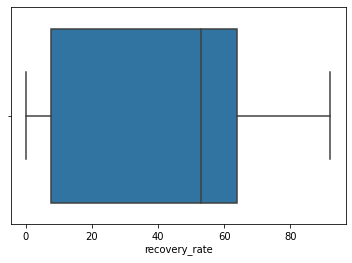

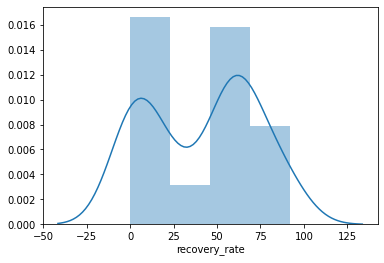

number of zero recovery rate on May 25:  11


,state,confirmed,deaths,recovered,active,people_tested,testing_rate,mortality_rate,incident_rate,date,mort_incid_prpt,recovery_rate
2380,Montana,479,16,441.0,22.0,33381.0,3123.286595,3.340292,44.817539,2020-05-25,13.417251,92.066806
2365,Hawaii,643,17,589.0,37.0,49572.0,3501.163947,2.643857,45.413710,2020-05-25,17.177068,91.601866
2402,Virgin Islands,69,6,61.0,2.0,1412.0,1316.329194,8.695652,64.324869,2020-05-25,7.397360,88.405797
2353,Alaska,407,10,358.0,39.0,43507.0,5947.275971,2.457002,55.635675,2020-05-25,22.643720,87.960688
2401,Vermont,956,54,839.0,63.0,28590.0,4581.811538,5.648536,153.207829,2020-05-25,27.123460,87.761506
2364,Guam,166,5,138.0,23.0,5569.0,3390.996718,3.012048,101.078372,2020-05-25,33.558020,83.132530
2391,Oklahoma,6037,311,4688.0,1038.0,160980.0,4068.263326,5.151565,152.566193,2020-05-25,29.615502,77.654464
2397,South Dakota,4563,50,3371.0,1142.0,34905.0,3945.588074,1.095770,515.791961,2020-05-25,470.711743,73.876835
2372,Louisiana,37169,2691,26249.0,8229.0,316036.0,6798.236274,7.239904,799.540698,2020-05-25,110.435259,70.620679
2356,Arkansas,5922,116,4148.0,1658.0,108581.0,3598.013655,1.958798,196.235408,2020-05-25,100.181559,70.043904


In [170]:
#random 2 consec days comparison; assessing value interactions
may25 = cleancopy[cleancopy['date']=='2020-05-25'].sort_values(by='recovery_rate', ascending=False)

# states where recovery_rate is out of its avg bounds
print("MAY 25 \n", may25.recovery_rate.describe())
sns.boxplot(x=may25.recovery_rate)
plt.show()
sns.distplot(may25.recovery_rate)
plt.show()
print("number of zero recovery rate on May 25: ", len(may25[may25.recovery_rate == 0]))
may25

In [151]:
may26 = cleancopy[cleancopy['date']=='2020-05-25'].sort_values(by='recovery_rate', ascending=False)

,state,confirmed,deaths,recovered,active,people_tested,testing_rate,mortality_rate,incident_rate,date,mort_incid_prpt,recovery_rate
2380,Montana,479,16,441.0,22.0,33381.0,3123.286595,3.340292,44.817539,2020-05-25,7.453092,92.066806
2365,Hawaii,643,17,589.0,37.0,49572.0,3501.163947,2.643857,45.413710,2020-05-25,5.821715,91.601866
2402,Virgin Islands,69,6,61.0,2.0,1412.0,1316.329194,8.695652,64.324869,2020-05-25,13.518336,88.405797
2353,Alaska,407,10,358.0,39.0,43507.0,5947.275971,2.457002,55.635675,2020-05-25,4.416236,87.960688
2401,Vermont,956,54,839.0,63.0,28590.0,4581.811538,5.648536,153.207829,2020-05-25,3.686845,87.761506
2364,Guam,166,5,138.0,23.0,5569.0,3390.996718,3.012048,101.078372,2020-05-25,2.979914,83.132530
2391,Oklahoma,6037,311,4688.0,1038.0,160980.0,4068.263326,5.151565,152.566193,2020-05-25,3.376610,77.654464
2397,South Dakota,4563,50,3371.0,1142.0,34905.0,3945.588074,1.095770,515.791961,2020-05-25,0.212444,73.876835
2372,Louisiana,37169,2691,26249.0,8229.0,316036.0,6798.236274,7.239904,799.540698,2020-05-25,0.905508,70.620679
2356,Arkansas,5922,116,4148.0,1658.0,108581.0,3598.013655,1.958798,196.235408,2020-05-25,0.998188,70.043904


# STOPPED HERE 7/24: 
Continue with getting diff for each state's daily var values, then aggregating all states' means. Turn into timeseries by transpose 

# Assess data to determine which model to use

    - What may have to be done is get the mean for each X features for each day (that means outliers need to
      be assessed??)
    
    - We have to categorize the dataset into two groups based on safe-range (considering mean/iqr/z-scores). 
      0 for normal, 1 for risky. Not sure yet how to determine those categories. Perhaps, assess y value ranges
      as well as, I guess using linreg, feature values' interactions in predicting its corresponding y for that
      date?
      
    - after categorizing into two, proceed with log regression for more accurate prediction coef?
    
    - then ml optimization

In [ ]:
# try z-scores on each day df for each 